In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


In [5]:
##Loading dataset
from keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 701s 4us/step


In [7]:
print(type(x_train))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [8]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


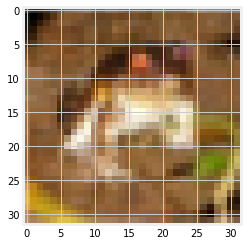

In [9]:
plt.imshow(x_train[0])

In [10]:
print(y_train[0])

[6]


In [11]:
##creating labels into one hot vector
y_train_oneHot = to_categorical(y_train)
y_test_oneHot = to_categorical(y_test)

In [12]:
print(y_train_oneHot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [13]:
##Normalising pixel values between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [37]:
#Model
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

model = Sequential()

model.add(Conv2D(32,(5,5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(800, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 800)               640800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 800)              

In [40]:
model_hist = model.fit(x_train,y_train_oneHot, batch_size = 256, epochs=10, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 67s 2ms/step - loss: 1.7119 - accuracy: 0.3661 - val_loss: 1.4296 - val_accuracy: 0.4836
Epoch 2/10
40000/40000 [==============================] - 44s 1ms/step - loss: 1.3462 - accuracy: 0.5102 - val_loss: 1.3261 - val_accuracy: 0.5304
Epoch 3/10
40000/40000 [==============================] - 33s 818us/step - loss: 1.2069 - accuracy: 0.5677 - val_loss: 1.1841 - val_accuracy: 0.5776
Epoch 4/10
40000/40000 [==============================] - 33s 818us/step - loss: 1.0963 - accuracy: 0.6096 - val_loss: 1.0925 - val_accuracy: 0.6145
Epoch 5/10
40000/40000 [==============================] - 33s 817us/step - loss: 1.0137 - accuracy: 0.6405 - val_loss: 1.0630 - val_accuracy: 0.6249
Epoch 6/10
40000/40000 [==============================] - 33s 822us/step - loss: 0.9148 - accuracy: 0.6744 - val_loss: 1.0650 - val_accuracy: 0.6304
Epoch 7/10
40000/40000 [==============================] - 32

In [42]:
model.save("./Models/Image_classification_CNN")

In [44]:
#Evaluating model
model.evaluate(x_test,y_test_oneHot)[1]

10000/10000 [==============================] - 3s 254us/step


0.6728000044822693

numpy.ndarray